In [1]:
from google.colab import files
uploaded = files.upload()

Saving final_data.csv to final_data.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import sklearn

%matplotlib inline

df = pd.read_csv('final_data.csv')
df = df.drop(columns=['File Name','Sr'])
df = df.sample(frac=1).reset_index(drop=True)

In [3]:
#Use shuffle the data 
df


,Temperature,Series,Parallel,Shading,Number of cells,Voltage (V),Current (I),I/V,Solar Panel,Cell Number,Shade Percentage,IsShade
0,50,2,4,6,8,0.62,10.85,17.50,9798,6,75.00,1
1,50,3,3,2,9,1.08,10.84,10.04,10019,9,22.22,0
2,35,4,2,7,8,1.94,3.98,2.05,5029,2,87.50,1
3,30,10,1,9,10,5.83,-5.57,-0.95,2452,3,90.00,1
4,35,10,1,10,10,0.36,2.17,6.03,3665,6,100.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
101575,27,3,3,3,9,1.27,10.82,8.52,1068,1,33.33,1
101576,27,10,1,1,10,4.89,2.19,0.45,169,9,10.00,0
101577,45,10,1,9,10,0.54,2.17,4.02,7793,4,90.00,1
101578,45,10,1,9,10,0.27,2.17,8.04,7790,7,90.00,1


In [4]:
df.describe()

,Temperature,Series,Parallel,Shading,Number of cells,Voltage (V),Current (I),I/V,Solar Panel,Cell Number,Shade Percentage,IsShade
count,101580.000000,101580.000000,101580.000000,101580.000000,101580.000000,101580.000000,101580.000000,101580.000000,101580.000000,101580.000000,101580.000000,101580.000000
mean,37.816893,6.026580,2.387478,4.751920,9.508565,1.812974,4.220582,25.149340,5369.984347,5.254282,49.976373,0.499764
std,8.067579,3.338546,1.940320,3.052597,0.796899,1.557915,12.070529,130.060357,3109.685957,2.768180,31.755699,0.500002
min,27.000000,1.000000,1.000000,0.000000,8.000000,0.010000,-221.730000,-369.540000,1.000000,1.000000,0.000000,0.000000
25%,30.000000,3.000000,1.000000,2.000000,9.000000,0.590000,2.180000,0.710000,2671.000000,3.000000,20.000000,0.000000
50%,35.000000,5.000000,2.000000,5.000000,10.000000,1.320000,4.340000,3.170000,5385.500000,5.000000,50.000000,0.000000
75%,45.000000,10.000000,3.000000,7.000000,10.000000,2.580000,6.520000,12.770000,8053.000000,8.000000,80.000000,1.000000
max,50.000000,10.000000,10.000000,10.000000,10.000000,6.000000,43.420000,4342.380000,10767.000000,10.000000,100.000000,1.000000


In [5]:
df.isnull().sum().sum()

0

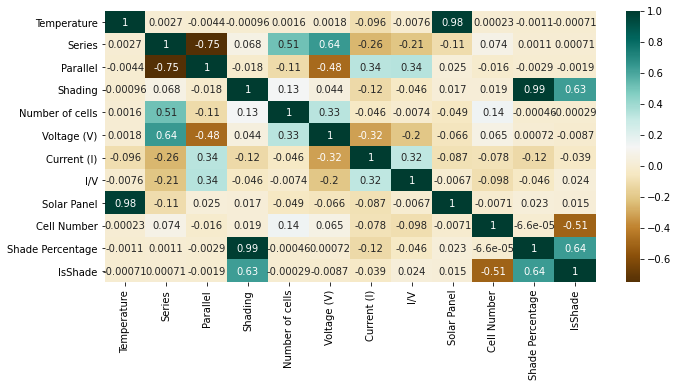

In [8]:
plt.figure(figsize=(11,5))
sns.heatmap(df.corr(),cmap="BrBG",annot=True)

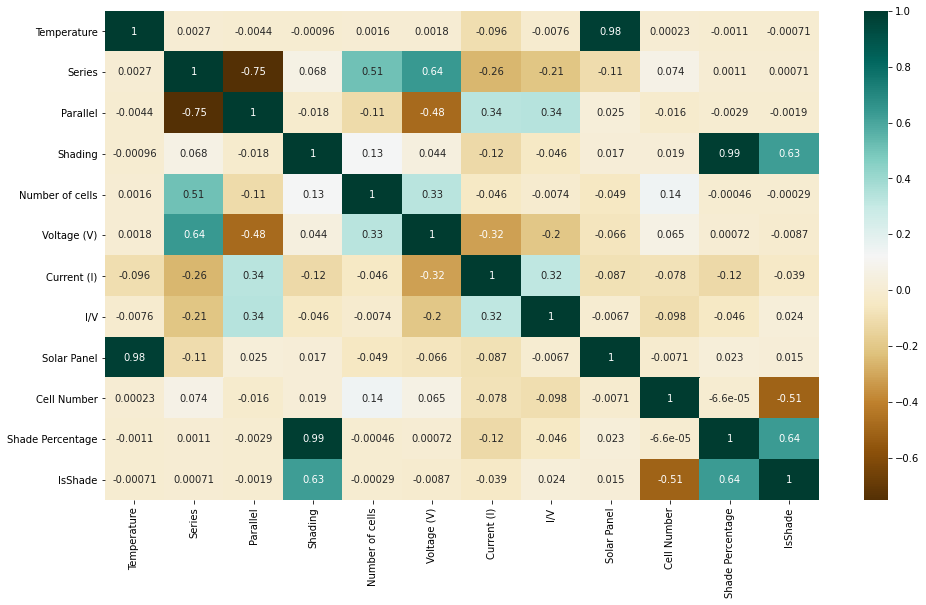

In [7]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="BrBG",annot=True)

We can observe that below columns are having strong correlation between each other
1. Solar Panel and Temperature (0.98)
2. Shading and Shade Percentage (0.99)
3. Series and Parallel (-0.75)    
4. Series and Voltage (0.64)
5. Series and Number of Cells (0.51)
6. Parallel and Voltage (-0.48)
7. Parallel and Current (0.34)
8. Parallel and I/V (0.34)
9. Voltage and Number of Cells (0.33)
10. Current and I/V (0.32)
11. Series and Current (-0.26)
12. Series and I/V (-0.21)


In [ ]:
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
df

,Temperature,Series,Parallel,Shading,Number of cells,Voltage (V),Current (I),I/V,Solar Panel,Cell Number,Shade Percentage,IsShade
0,50,2,4,7,8,0.98,5.16,5.26,9818,2,87.50,1
1,40,3,3,2,9,0.34,10.86,31.94,6431,7,22.22,0
2,40,10,1,5,10,0.71,2.18,3.07,5762,1,50.00,1
3,35,10,1,9,10,3.70,2.17,0.59,4238,10,90.00,1
4,35,5,2,1,10,0.96,6.52,6.79,5134,6,10.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...
101575,35,5,2,9,10,0.21,4.34,20.69,5367,1,90.00,1
101576,45,2,5,5,10,0.20,15.20,76.00,8122,10,50.00,1
101577,27,10,1,2,10,0.42,2.19,5.21,185,2,20.00,1
101578,40,1,10,3,10,0.29,36.90,127.26,6081,9,30.00,0


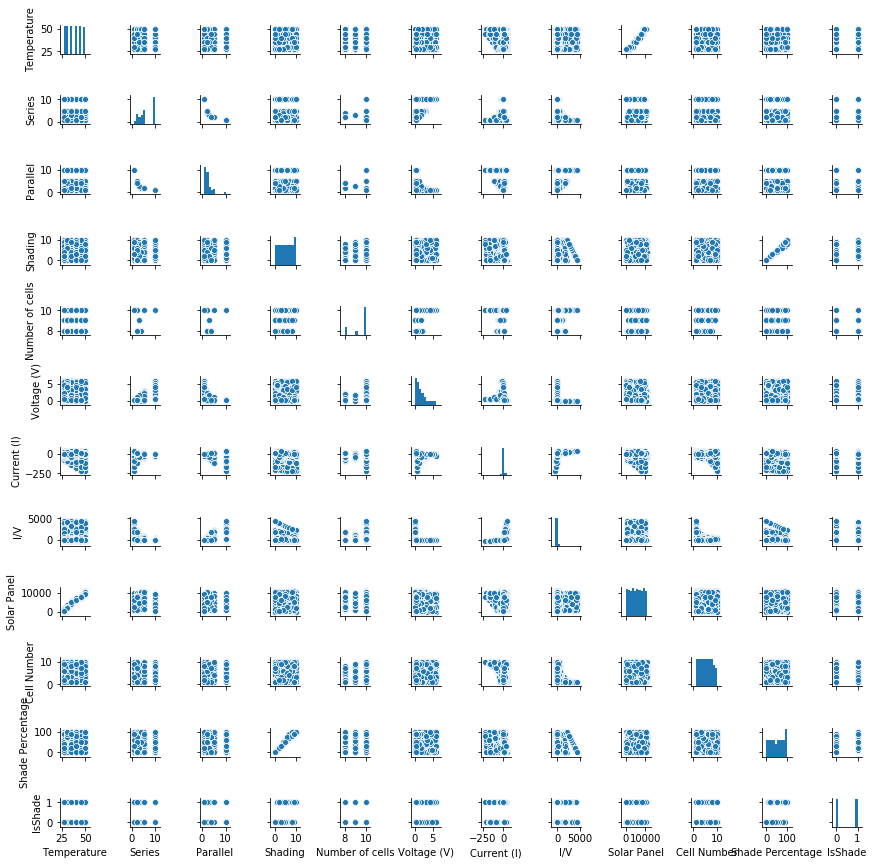

In [ ]:
sns.pairplot(df,height=1)

In [ ]:
matplotlib.rcParams['font.size'] = 20
sns.pairplot(df, hue = 'Temperature');

C:\Users\shahh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\shahh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


In [ ]:
import sys
np.set_printoptions(threshold=sys.maxsize)

In [ ]:

# Labels are the values we want to predict
labels = np.array(df['IsShade'])
# labels

# Remove the labels from the features
# # axis 1 refers to the columns
features= df.drop('IsShade', axis = 1)
# features
# # # Saving feature names for later use
feature_list = list(features.columns)
# feature_list
# # # Convert to numpy array
features = np.array(features)
# features
# print(feature_list)

In [ ]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.34, random_state = 42)

In [ ]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (67042, 10)
Training Labels Shape: (67042,)
Testing Features Shape: (34538, 10)
Testing Labels Shape: (34538,)


In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# # Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
# rf
# Train the model on training data
rf.fit(train_features, train_labels);

In [ ]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# test_features
# Calculate the absolute errors
errors = abs(predictions - test_labels)
errors
# Print out the mean absolute error (mae)
# print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
# Mean Absolute Error: 3.83 degrees.

array([0.  , 0.01, 0.11, 0.79, 0.  , 0.  , 0.45, 0.  , 0.43, 0.27, 0.  ,
       0.14, 0.  , 0.01, 0.16, 0.  , 0.01, 0.  , 0.02, 0.03, 0.12, 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.02, 0.04, 0.01, 0.22, 0.  , 0.07, 0.02,
       0.01, 0.  , 0.02, 0.03, 0.  , 0.01, 0.  , 0.01, 0.04, 0.  , 0.  ,
       0.02, 0.02, 0.  , 0.  , 0.03, 0.  , 0.1 , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.02, 0.37, 0.  ,
       0.44, 0.  , 0.  , 0.  , 0.02, 0.  , 0.02, 0.  , 0.01, 0.  , 0.  ,
       0.02, 0.  , 0.  , 0.  , 0.  , 0.  , 0.08, 0.04, 0.02, 0.03, 0.02,
       0.01, 0.13, 0.01, 0.15, 0.34, 0.26, 0.  , 0.17, 0.13, 0.  , 0.38,
       0.23, 0.  , 0.02, 0.1 , 0.01, 0.24, 0.15, 0.83, 0.04, 0.  , 0.01,
       0.05, 0.23, 0.  , 0.01, 0.06, 0.02, 0.  , 0.24, 0.  , 0.11, 0.01,
       0.08, 0.01, 0.  , 0.  , 0.01, 0.  , 0.06, 0.05, 0.11, 0.16, 0.01,
       0.11, 0.01, 0.  , 0.  , 0.08, 0.  , 0.03, 0.08, 0.  , 0.  , 0.02,
       0.05, 0.54, 0.  , 0.  , 0.  , 0.02, 0.09, 0.

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(test_labels, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(test_labels, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_labels, predictions)))

Mean Absolute Error: 0.05713996178122648
Mean Squared Error: 0.016553309398343846
Root Mean Squared Error: 0.1286596650016774


In [ ]:
from sklearn.metrics import accuracy_score


In [ ]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: nan %.
